#Desarrollo de Trabajo Practico Grupal ⚛

In [2]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DatosExel = pd.read_csv('Datos-Grupo-4.csv')
tabla = pd.DataFrame(DatosExel)
datos = pd.DataFrame()
histogram = pd.DataFrame()

#Resolucion del Ejercicio 1
---

In [41]:
conteo = tabla['Deporte'].value_counts().sort_index()
datos['Datos'] = ['Básquetbol', 'Natación', 'Netball', 'Remo', 'Tenis', 'Waterpolo']
datos['Frecuencia Absoluta'] = conteo.values
datos['Frecuencia Absoluta Acumulada'] = datos['Frecuencia Absoluta'].cumsum()
datos['Frecuencia Relativa'] = round(datos['Frecuencia Absoluta'] / datos['Frecuencia Absoluta'].sum(), 2)
datos['Frecuencia Relativa Acumulada'] = round(datos['Frecuencia Relativa'].cumsum(), 2)
datos['Porcentaje'] = ((datos['Frecuencia Relativa'] * 100).round().astype(int)).apply(lambda x: str(x) + '%')
print("\t\t\t\t\t\tTabla de frecuencias de Deporte")
datos

						Tabla de frecuencias de Deporte


,Datos,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Porcentaje
0,Básquetbol,25,25,0.19,0.19,19%
1,Natación,22,47,0.16,0.35,16%
2,Netball,23,70,0.17,0.52,17%
3,Remo,37,107,0.27,0.79,27%
4,Tenis,11,118,0.08,0.87,8%
5,Waterpolo,17,135,0.13,1.00,13%


#Resolucion del Ejercicio 2

---



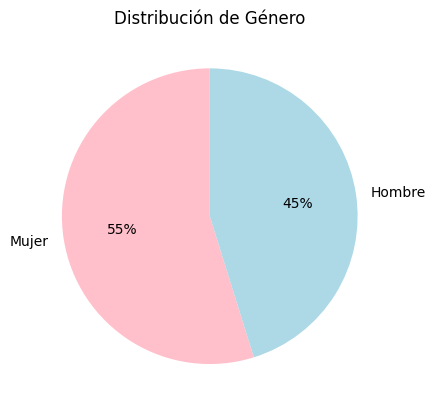

In [5]:
cantidad = tabla['Sexo'].value_counts()
etiquetas = ['Mujer', 'Hombre']
colores = ['#FFC0CB', '#ADD8E6']
plt.pie(cantidad, labels=etiquetas, autopct='%1.0f%%', startangle=90, colors=colores)
plt.title('Distribución de Género')
plt.show()

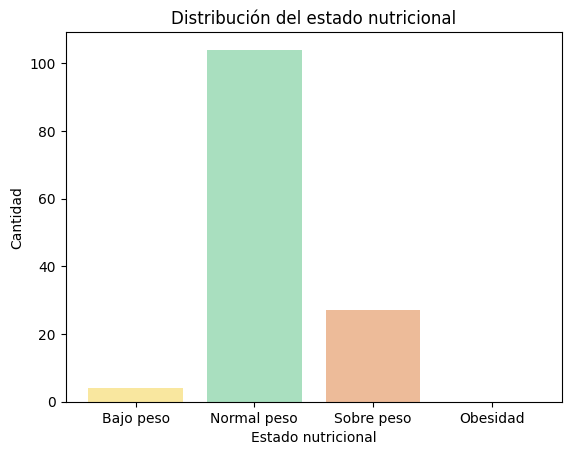

In [28]:
conteo = tabla['Estado nutricional'].value_counts()
mapeo = {1: 'Bajo peso', 2: 'Normal peso', 3: 'Sobre peso', 4: 'Obesidad'}
conteo = conteo.reindex([1, 2, 3, 4], fill_value=0)
conteo.index = conteo.index.map(mapeo)
colores = ['#F9E79F', '#A9DFBF', '#EDBB99', '#F68081']
plt.bar(conteo.index, conteo.values, color=colores)
plt.title('Distribución del estado nutricional')
plt.xlabel('Estado nutricional')
plt.ylabel('Cantidad')
plt.show()


#Resolucion del Ejercicio 3
---



El HISTOGRAMA es la representación gráfica de una distribución de frecuencias. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

In [8]:
intervalos = round(math.log2(len(DatosExel.N)))

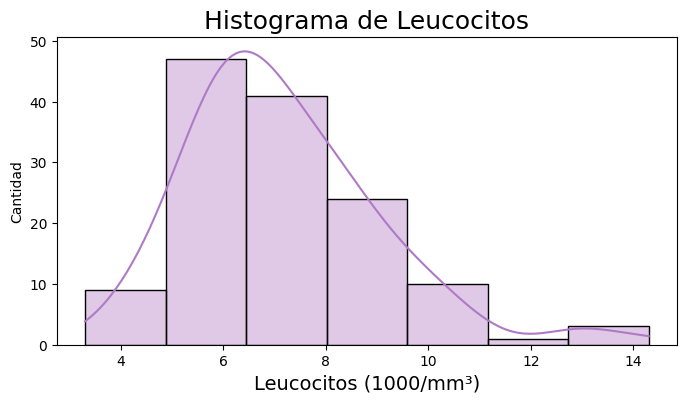

In [9]:
ax = sns.histplot(DatosExel.Leucocitos, kde=True, color='#AF7AC5', alpha=.4, bins=intervalos)
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma de Leucocitos', fontsize=18)
ax.set_xlabel('Leucocitos (1000/mm³)', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=10)
plt.show()

In [49]:
tabla_intervalos = pd.cut(DatosExel.Leucocitos, bins=intervalos)
tabla_frecuencias = pd.value_counts(tabla_intervalos).reset_index()
tabla_frecuencias.columns = ['Intervalo', 'Frecuencia Absoluta']
tabla_frecuencias = tabla_frecuencias.sort_values('Intervalo').reset_index(drop=True)
tabla_frecuencias['Frecuencia Absolutas acumuladas'] = tabla_frecuencias['Frecuencia Absoluta'].cumsum()
tabla_frecuencias['Frecuencia Relativas'] = (tabla_frecuencias['Frecuencia Absoluta'] / tabla_frecuencias['Frecuencia Absoluta'].sum()).round(2)
tabla_frecuencias['Frecuencia Relativas acumuladas'] = tabla_frecuencias['Frecuencia Relativas'].cumsum().round(2)
print("\t\t\t\t\t\tTabla de frecuencias de los Leucocitos")
tabla_frecuencias

						Tabla de frecuencias de los Leucocitos


,Intervalo,Frecuencia Absoluta,Frecuencia Absolutas acumuladas,Frecuencia Relativas,Frecuencia Relativas acumuladas
0,"(3.289, 4.871]",9,9,0.07,0.07
1,"(4.871, 6.443]",47,56,0.35,0.42
2,"(6.443, 8.014]",41,97,0.30,0.72
3,"(8.014, 9.586]",24,121,0.18,0.90
4,"(9.586, 11.157]",10,131,0.07,0.97
5,"(11.157, 12.729]",1,132,0.01,0.98
6,"(12.729, 14.3]",3,135,0.02,1.00


#Resolucion del Ejercicio 4
---


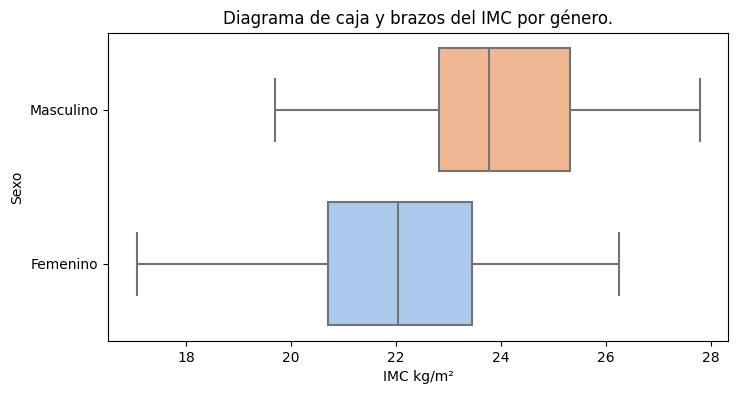

In [11]:
tabla['Sexo'] = tabla['Sexo'].replace({1: 'Masculino', 2: 'Femenino'})
plt.figure(figsize=(8, 4))
sns.boxplot(data=tabla, y="Sexo", x="IMC", palette="pastel")
plt.title('Diagrama de caja y brazos del IMC por género.')
plt.xlabel('IMC kg/m²')
plt.ylabel('Sexo')
plt.gca().invert_yaxis()
plt.show()

#Resolucion del Ejercicio 5
---


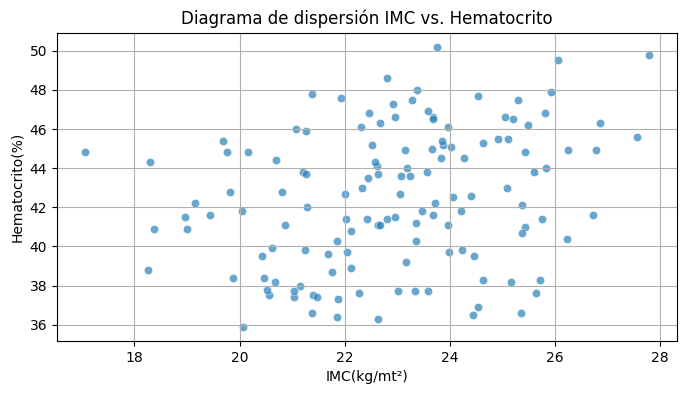

In [12]:
disper = sns.scatterplot(data=DatosExel, x="IMC", y="Hematocrito", color='#2980B9', alpha=0.7)
disper.figure.set_size_inches(8,4)
plt.title('Diagrama de dispersión IMC vs. Hematocrito')
plt.xlabel('IMC(kg/mt²)')
plt.ylabel('Hematocrito(%)')
plt.grid(True)
plt.show()

#Resolucion del Ejercicio 6

---

In [13]:
#------LEUCOCITOS------
#------MEDIANA------
data_mediana = tabla['Leucocitos'].values
mediana_leuco = np.median(data_mediana)
#-----1er Cuartil-----
data_Cuartil = tabla['Leucocitos']
primer_cuartil_leu = np.percentile(data_Cuartil, 25)
#-----3er Cuartil-----
tercer_cuartil_leu = np.percentile(data_Cuartil, 75)

#-----HEMATOCRITO-----
#-----Desvio estandar-----
data_hematocrito = tabla['Hematocrito']
desvio_estandar_hema = np.std(data_hematocrito)

#-----ERITROCITOS-----
#-----mediana
data_mediana_eritrocitos = tabla['Eritrocitos'].values
mediana_eritrocitos = np.median(data_mediana_eritrocitos)
#----MEDIANA----
data_eritrocitos = tabla['Eritrocitos']
media_eritrocito = np.mean(data_eritrocitos)
#----1er cuartil-----
primer_cuartil_eri = np.percentile(data_eritrocitos, 25)
#----3er cuartil-----
tercer_cuartil_eri = np.percentile(data_eritrocitos, 75)
#----desvio estandar-----
desvio_estandar_eri = np.std(data_eritrocitos)
#----minimo----
minimo_eri = np.min(data_eritrocitos)
#----maximo----
maximo_eri = np.max(data_eritrocitos)

In [14]:
print("LEUCOCITOS:")
print("Mediana de los leucocitos:", mediana_leuco)
print("Primer Cuartil:", primer_cuartil_leu)
print("Tercer Cuartil:", tercer_cuartil_leu)
print("\nHEMATOCRITOS")
print("Desvío estándar del Hematocrito:", desvio_estandar_hema)
print("\nERITROCITOS")
print("Mediana de los Eritrocitos:", mediana_eritrocitos)
print("Media de los Eritrocitos:", media_eritrocito)
print("Primer Cuartil:", primer_cuartil_eri)
print("Tercer Cuartil:", tercer_cuartil_eri)
print("Desvío estándar de los Eritrocitos:", desvio_estandar_eri)
print("Mínimo Eritrocitos:", minimo_eri)
print("Máximo Eritrocitos:", maximo_eri)

LEUCOCITOS:
Mediana de los leucocitos: 6.8
Primer Cuartil: 5.9
Tercer Cuartil: 8.3

HEMATOCRITOS
Desvío estándar del Hematocrito: 3.4816315176496433

ERITROCITOS
Mediana de los Eritrocitos: 4.57
Media de los Eritrocitos: 4.640962962962963
Primer Cuartil: 4.31
Tercer Cuartil: 5.015
Desvío estándar de los Eritrocitos: 0.4243493914637622
Mínimo Eritrocitos: 3.8
Máximo Eritrocitos: 5.66
